# cleaning data

NAmes      319
CollgCr    186
OldTown    161
Gilbert    120
Edwards    118
Sawyer     113
Somerst    110
NWAmes     109
NridgHt     90
SawyerW     86
Mitchel     79
BrkSide     79
Crawfor     71
NoRidge     55
IDOTRR      42
Timber      37
SWISU       34
StoneBr     33
MeadowV     26
BrDale      25
ClearCr     25
Veenker     20
NPkVill     19
Blmngtn     19
Greens       8
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'FinBsmtSF', 'To

(1979, 79)

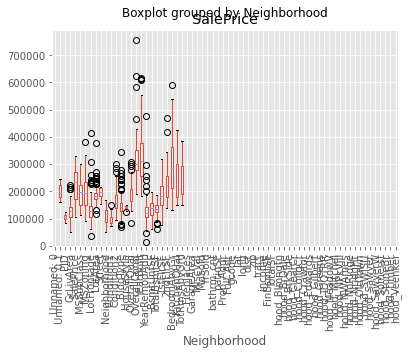

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

##train = pd.read_csv("data/train_set.csv")

print(train.Neighborhood.value_counts())
train.boxplot(column ='SalePrice', by = 'Neighborhood')

# Dummies for Neigghborhood

train.columns

dummy = pd.get_dummies(train['Neighborhood'], prefix='hood')
drop_col = train['Neighborhood'].mode()[0]
dummy.drop(['hood_'+drop_col], axis = 1, inplace= True) # race 1 is the dominant category
dummy.head()

train = pd.concat([train, dummy], axis= 1) 
train.shape

print(train.columns)

##Fill in Na with Median
# Lot Frontage

front = train.LotFrontage
med = front.median()

train['LotFrontage'].fillna(med,inplace= True)
#hs_na = train.isna().sum()
#hs_na.plot.bar()


# Income
front = train.income
med = front.median()

train['income'].fillna(med,inplace= True)


missingRows = pd.isnull(train.loc[:, train.columns != 'tract']).any(axis = 1)


#missingRows = pd.isnull(trai)
missingRows.sum()
train = train[~missingRows] 

hs_na = train.isna().sum()
hs_na.plot.bar()


# Zoning Dummy

dummies = pd.get_dummies(train, prefix=['MSZoning'], columns = ['MSZoning'], drop_first = True)
dummies = dummies[['PID','MSZoning_RH','MSZoning_RL','MSZoning_RM']]
train = train.merge(dummies, left_on = 'PID', right_on = 'PID')

def near_rr(df):
    rr = ['RRAe', 'RRAn', 'RRNn','RRNe']
    if df['Condition1'] in rr:
        return 1
    if df['Condition2'] in rr:
        return 1
    else:
        return 0

# Creating near RR column
train['NearRR'] = train.apply(near_rr, axis =1)

def near_pos(df):
    pos = ['PosA', 'PosN']
    if df['Condition1'] in pos:
        return 1
    if df['Condition2'] in pos:
        return 1
    else:
        return 0

# Creating near Positive Feature column
train['NearPos'] = train.apply(near_pos, axis = 1)

# Creating function to see if Condition1 or Condition2 shows house is adjacent to arterial road
def near_art(df):
    art = ['Artery']
    if df['Condition1'] in art:
        return 1
    if df['Condition2'] in art:
        return 1
    else:
        return 0

# Creating adjacent to arterial road column
train['Artery'] = train.apply(near_art, axis = 1)

# Function to converting ordinal KitchenQual to number
def qual_to_num_kit(df):
    if df['KitchenQual'] == 'Po':
        return 1
    if df['KitchenQual'] == 'Fa':
        return 2
    if df['KitchenQual'] == 'TA':
        return 3
    if df['KitchenQual'] == 'Gd':
        return 4
    if df['KitchenQual'] == 'Ex':
        return 5

# Replacing Kitchen Qual string values with numerical
train['KitchenQual'] = train.apply(qual_to_num_kit, axis = 1)

train.shape

train.columns

# Building Types

# separate dummy df
dum_bldgtype = pd.get_dummies(train.BldgType, prefix='BldgType')
dum_bldgtype.drop('BldgType_'+str(train['BldgType'].mode()[0]), axis=1, inplace=True)
train = pd.concat([train, dum_bldgtype], axis=1)


# House Style

train['HouseStyle'].replace('2.5Fin', '2Story', inplace=True)
train['HouseStyle'].replace('2.5Unf', '1Story', inplace=True)
train['HouseStyle'].replace('1.5Unf', '1.5Fin', inplace=True)

dum_housestyle = pd.get_dummies(train.HouseStyle, prefix='HouseStyle')
dum_housestyle.drop('HouseStyle_'+str(train['HouseStyle'].mode()[0]), axis=1, inplace=True)
# concatenating dum_housestyle with train
train = pd.concat([train, dum_housestyle], axis=1)


train.shape

train.columns

coldrop = ['Unnamed: 0','Unnamed: 0.1','MSSubClass']
train = train.drop(coldrop, axis = 1)

train.shape









In [21]:
#missingRows = pd.isnull(train.loc[:, train.columns != 'tract']).any(axis = 1)
train = train[train.dist<500]
train['dist'].max()


#train_num[train_num['dist'] < 100]['dist'].hist()

5.706071862524853

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

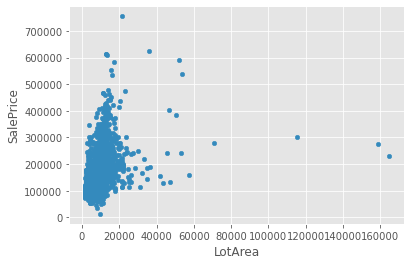

In [22]:
train.plot.scatter(y = 'SalePrice', x ='LotArea')

In [16]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal',
       'MoSold', 'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr',
       'gcode', 'lat', 'long', 'dist', 'zip', 'tract', 'income', 'FinBsmtSF',
       'TotalSF', 'hood_Blmngtn', 'hood_BrDale', 'hood_BrkSide',
       'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor', 'hood_Edwards',
       'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR', 'hood_MeadowV',
       'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes', 'hood_NoRidge',
       'hood_NridgHt', 'hood_OldTown', 'hood_SWISU', 'hood_Sawyer',
       'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr', 'hood_Timber',
       'hood_Veenker', 'MSZoning_RH', 'MSZoning_R

In [28]:
tt = train[train['LotArea'] > 100000].iloc[:,1:15]
tt

,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
934,1824,302000,RL,68.0,115149,Pave,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971
1271,2144,277000,RL,68.0,159000,Pave,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958
1374,1786,228950,RL,68.0,164660,Grvl,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965


<AxesSubplot:>

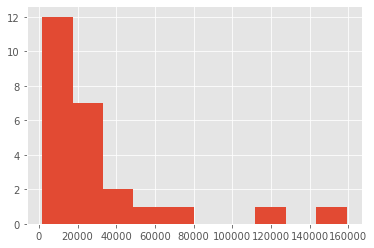

In [32]:
tt = train[train['Neighborhood'] == 'ClearCr']
tt['LotArea'].hist()



In [33]:
tt = train[train['LotArea'] > 100000]
tt['Full_Adr']

934     4200 ARIZONA CIR, Ames, IA
1271       4813 DOVER DR, Ames, IA
1374    3265 DARTMOOR RD, Ames, IA
Name: Full_Adr, dtype: object

<AxesSubplot:xlabel='LotArea', ylabel='TotalSF'>

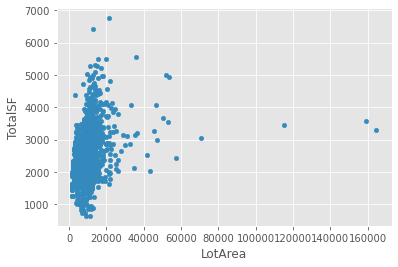

In [17]:
train.plot.scatter(y = 'TotalSF', x ='LotArea')

In [18]:
#train = train[train.LotArea<100000]
#train['LotArea'].max()

70761

<AxesSubplot:xlabel='LotArea', ylabel='TotalSF'>

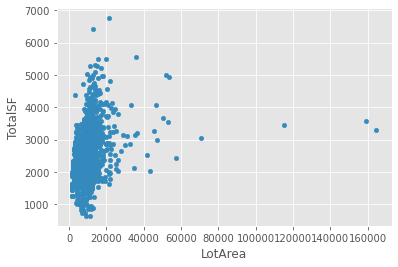

In [34]:
train.plot.scatter(y = 'TotalSF', x ='LotArea')